# 【 プログラミング入門 ～ Matplotlib ～ 】　勉強会解答例　  by にんにん

In [11]:
#0
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline

df = pd.read_excel('SSDSE-E-2023.xlsx', skiprows=2, index_col=1)
df.head()

,地域コード,総人口,日本人人口,15歳未満人口,15～64歳人口,65歳以上人口,外国人人口,出生数,合計特殊出生率,死亡数,...,歯科診療所数,医師数,歯科医師数,薬剤師数,保育所等数,保育所等在所児数,消費支出（二人以上の世帯）,食料費（二人以上の世帯）,住居費（二人以上の世帯）,教養娯楽費（二人以上の世帯）
都道府県,,,,,,,,,,,,,,,,,,,,,
全国,R00000,125502000,122780000,14784000,74504000,36214000,2402460,840835,1.36,1372755,...,67874,339623,107443,321982,29474,2624335,279024,75761,18329,24545
北海道,R01000,5183000,5147000,544000,2953000,1686000,34321,29523,1.24,65078,...,2840,13731,4418,11802,1045,79404,268396,71448,22013,23762
青森県,R02000,1221000,1216000,127000,676000,419000,5409,6837,1.38,17905,...,511,2773,735,2345,475,30723,245117,69503,13232,19092
岩手県,R03000,1196000,1189000,129000,659000,409000,6937,6718,1.35,17204,...,566,2700,1016,2536,390,28895,272911,73738,17181,22302
宮城県,R04000,2290000,2269000,264000,1371000,655000,19453,14480,1.23,24632,...,1052,5950,1896,5502,492,39497,284171,75689,19852,24985


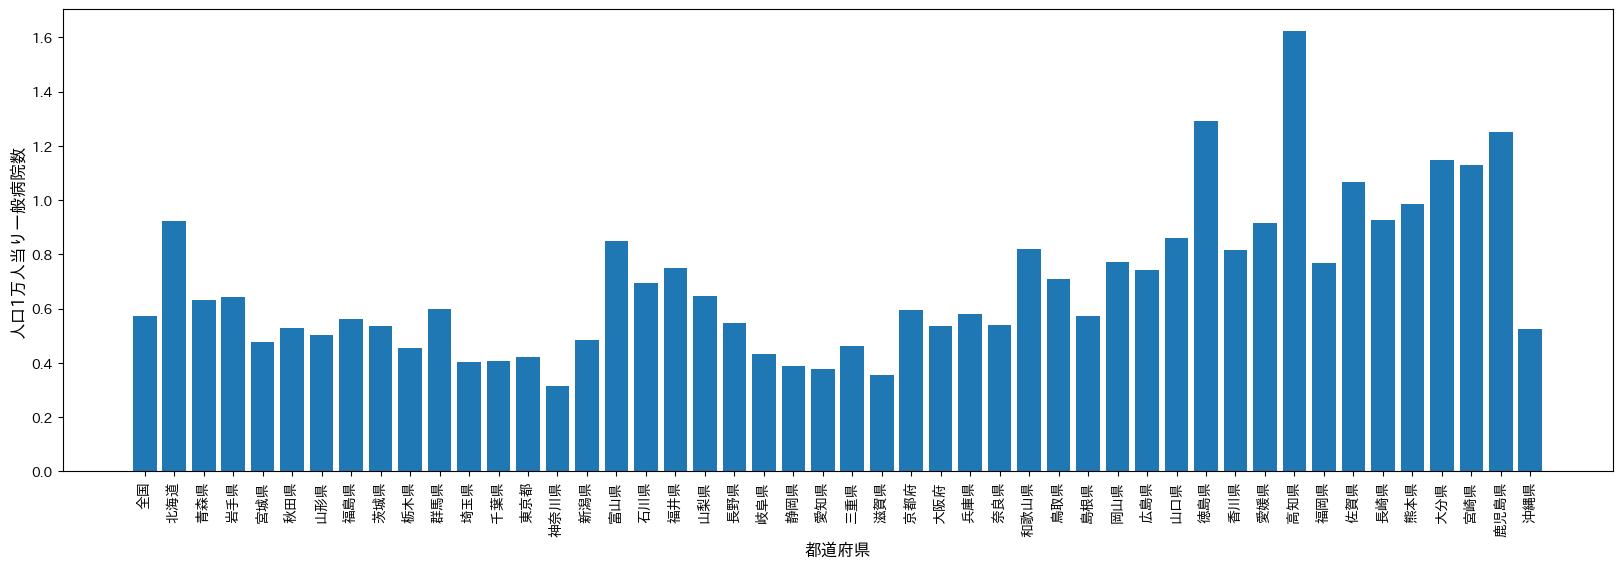

In [33]:
#1
df01 = df[['一般病院数', '一般診療所数', '総人口', '医師数']][:]
df01['人口1万人当り一般病院数'] = df01['一般病院数'] / df01['総人口'] * 10000

fig, ax = plt.subplots(figsize=(20, 6))
bar1_heights = df01['人口1万人当り一般病院数']
ax.bar(x=df01.index, height=bar1_heights)
ax.tick_params(axis='x', rotation=90, labelsize=10)
ax.set_xlabel('都道府県', fontsize=12)
ax.set_ylabel('人口1万人当り一般病院数', fontsize=12)
plt.show()

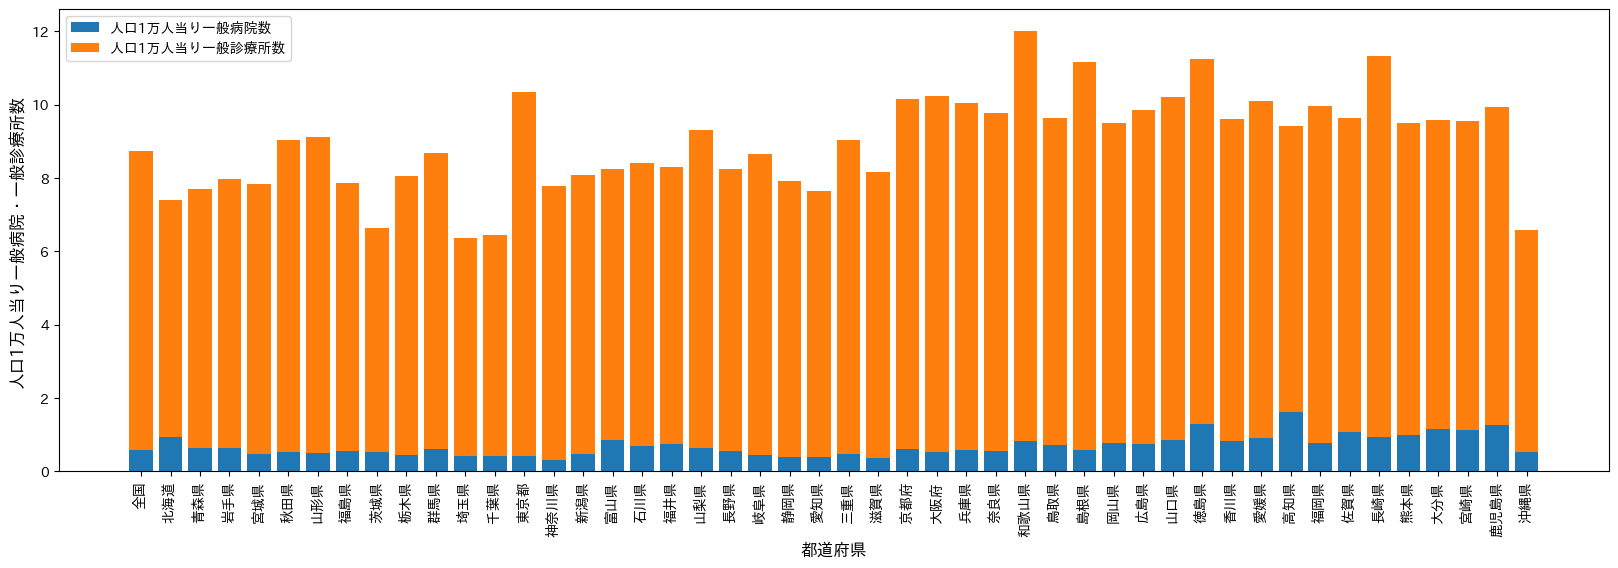

In [30]:
#2
df01['人口1万人当り一般診療所数'] = df01['一般診療所数'] / df01['総人口'] * 10000

fig, ax = plt.subplots(figsize=(20, 6))
bar2_heights = df01['人口1万人当り一般診療所数']

ax.bar(x=df01.index, height=bar1_heights, label='人口1万人当り一般病院数' )
ax.bar(x=df01.index, height=bar2_heights, bottom=bar1_heights, label='人口1万人当り一般診療所数')
ax.tick_params(axis='x', rotation=90, labelsize=10)
ax.set_xlabel('都道府県', fontsize=12)
ax.set_ylabel('人口1万人当り一般病院・一般診療所数', fontsize=12)
ax.legend()
plt.show()

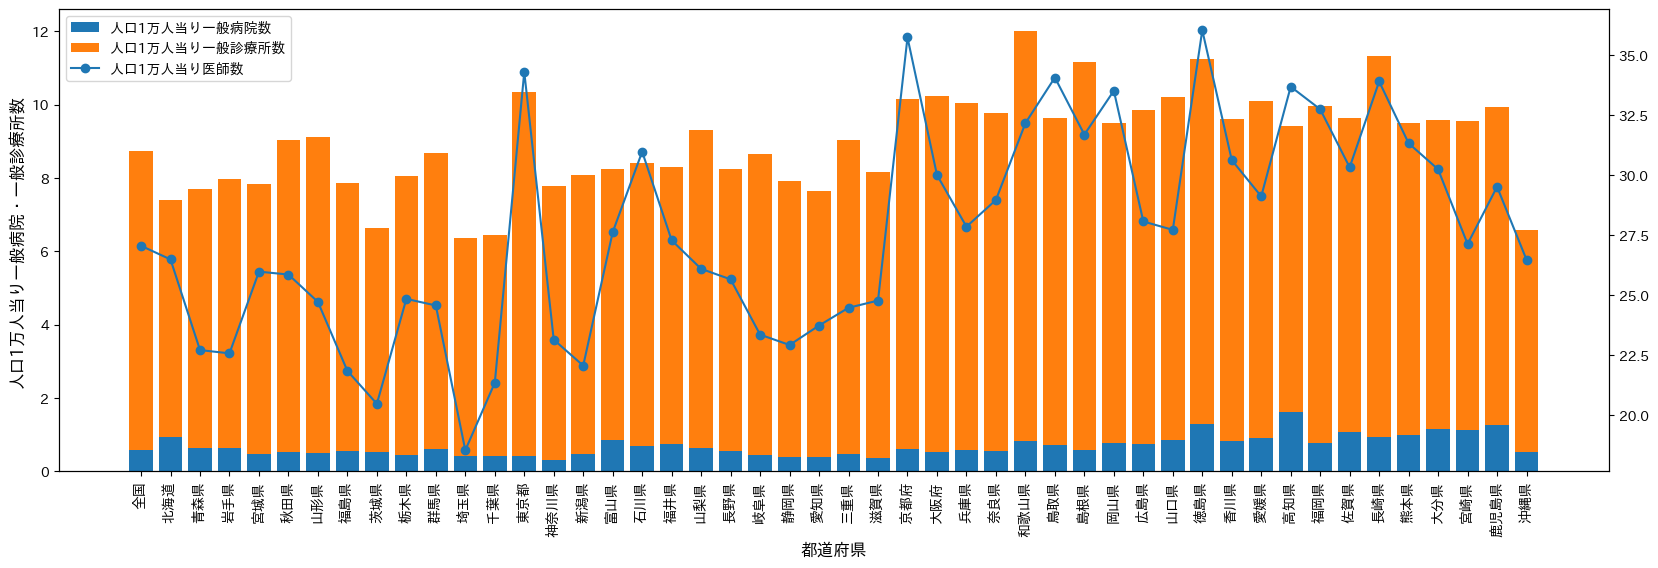

In [32]:
#3
df01['人口1万人当り医師数'] = df01['医師数'] / df01['総人口'] * 10000

fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(x=df01.index, height=bar1_heights, label='人口1万人当り一般病院数')
ax.bar(x=df01.index, height=bar2_heights, label='人口1万人当り一般診療所数',
       bottom=bar1_heights)
ax1 = ax.twinx()
ax1.plot(df01['人口1万人当り医師数'], marker='o', label='人口1万人当り医師数')

ax.tick_params(axis='x', rotation=90, labelsize=10)
ax.set_xlabel('都道府県', fontsize=12)
ax.set_ylabel('人口1万人当り一般病院・一般診療所数', fontsize=12)

hans1, labs1 = ax.get_legend_handles_labels()
hans2, labs2 = ax1.get_legend_handles_labels()
ax.legend(hans1+hans2, labs1+labs2, loc='upper left',
                    bbox_to_anchor=(0.0, 1.0,))
plt.show()

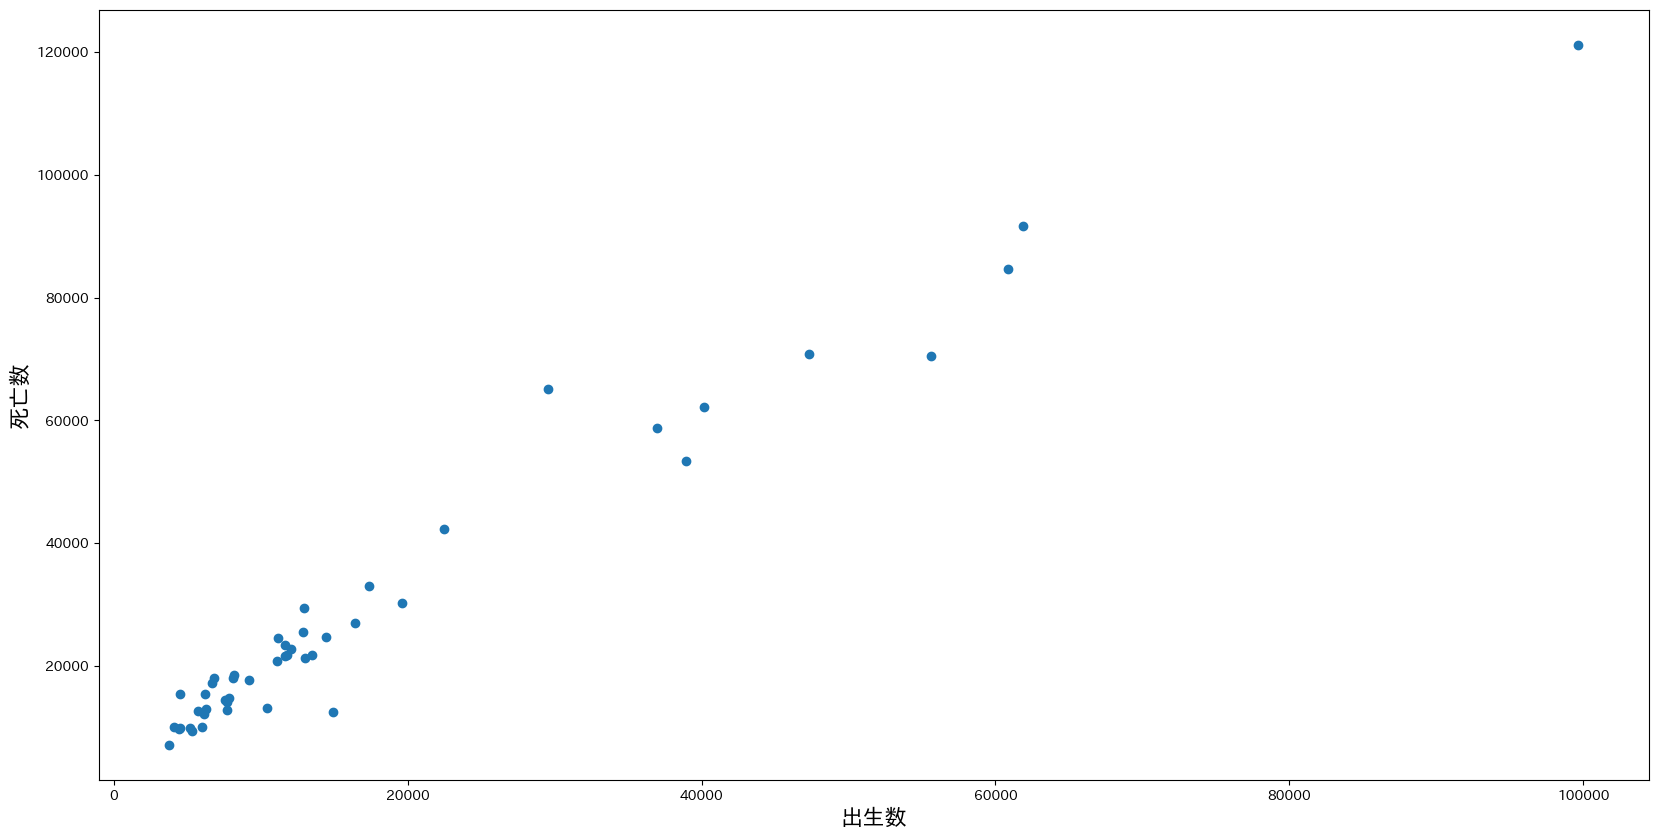

In [15]:
#4
df02 = df[['出生数','死亡数']][1:]

fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(x='出生数', y='死亡数', data=df02)
ax.set_xlabel('出生数', fontsize=16)
ax.set_ylabel('死亡数', fontsize=16)
plt.show()

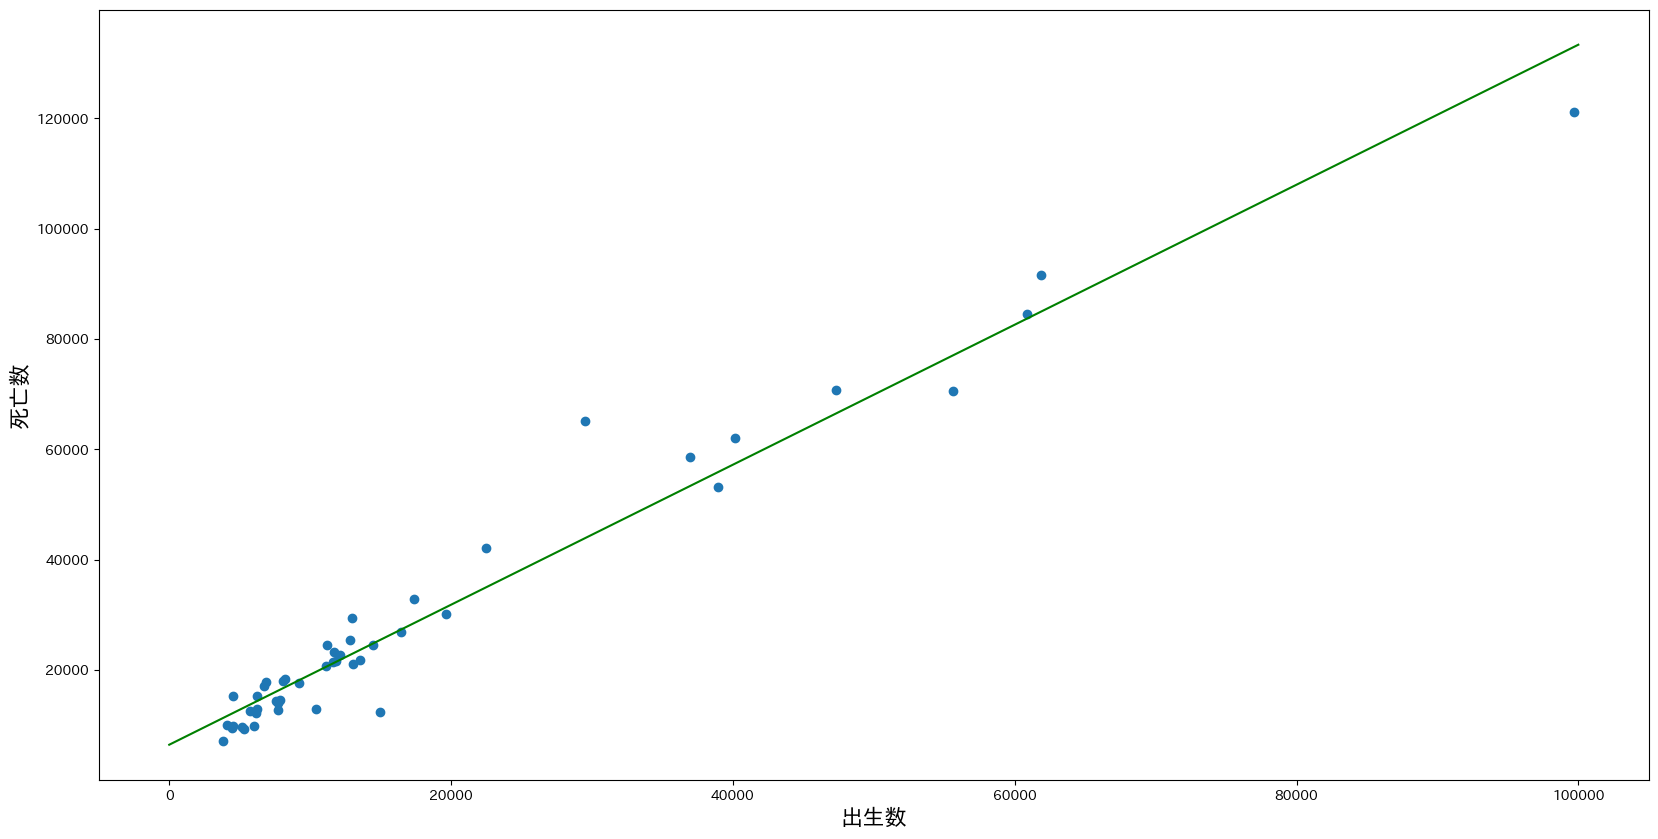

In [16]:
#5
a, b, = np.polyfit(df02['出生数'], df02['死亡数'], 1)
func = np.poly1d([a, b])
data = func(np.arange(0,100000))

fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(x='出生数', y='死亡数', data=df02)
ax.plot(data, color='green')
ax.set_xlabel('出生数', fontsize=16)
ax.set_ylabel('死亡数', fontsize=16)
plt.show()

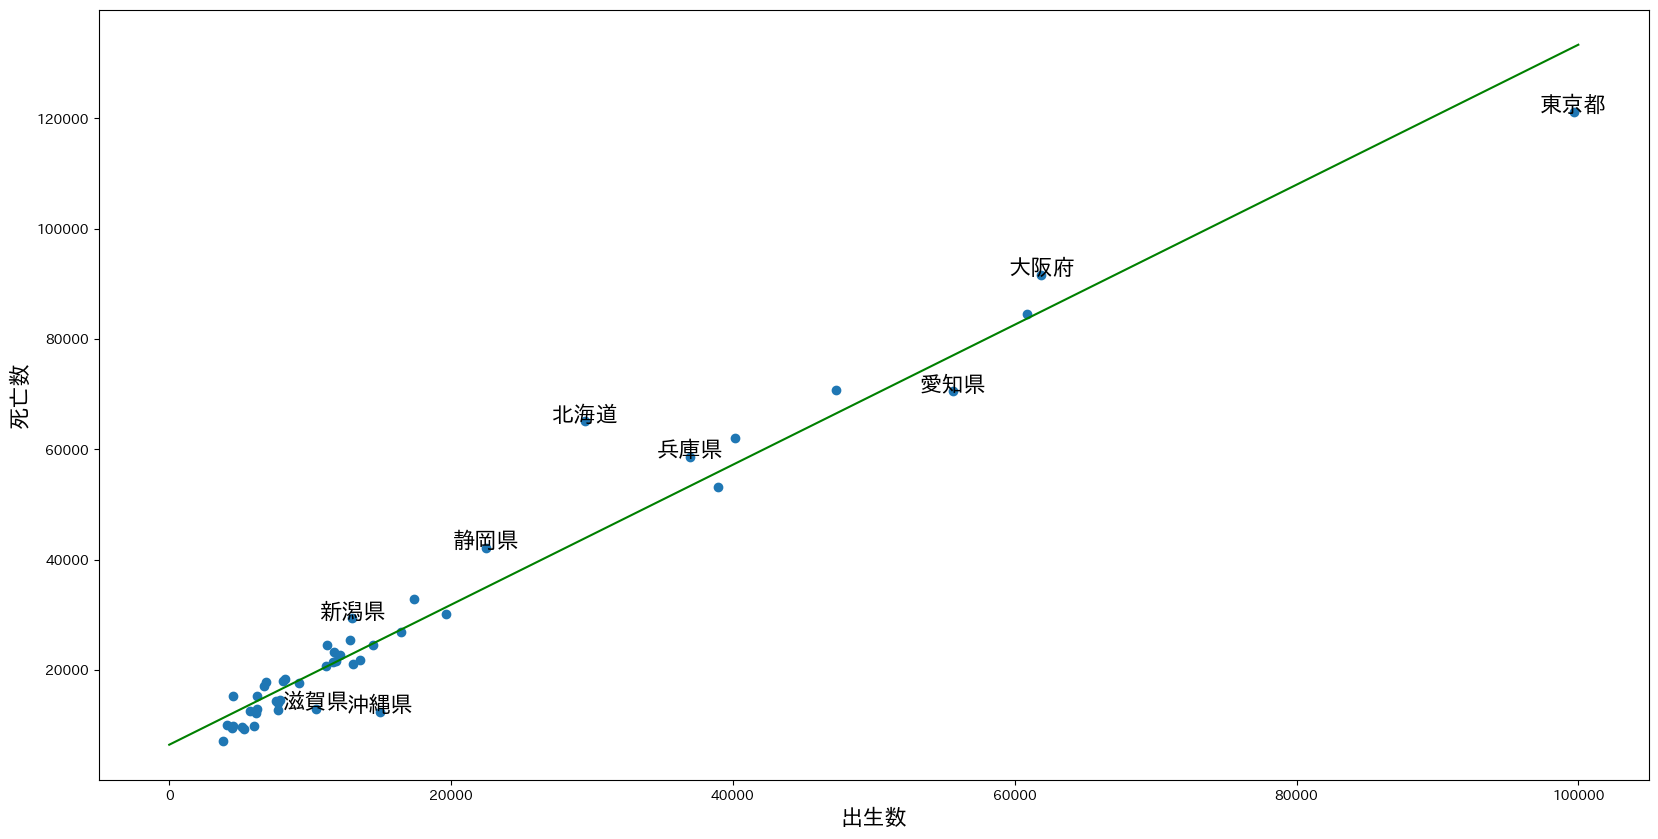

In [17]:
#6
a, b, = np.polyfit(df02['出生数'], df02['死亡数'], 1)
func = np.poly1d([a, b])
data = func(np.arange(0,100000))

fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(x='出生数', y='死亡数', data=df02)
ax.plot(data, color='green')
ax.set_xlabel('出生数', fontsize=16)
ax.set_ylabel('死亡数', fontsize=16)

def distance(x, y, a, b):
    return np.abs(a * x - y + b) / np.sqrt(a**2 + 1)

for i, (xi, yi) in enumerate(zip(df02['出生数'], df02['死亡数'])):
    if distance(xi, yi, a, b) >= 3000:
        ax.annotate(text=df02.index[i], xy=(xi, yi), ha='center', fontsize=16)
plt.show()

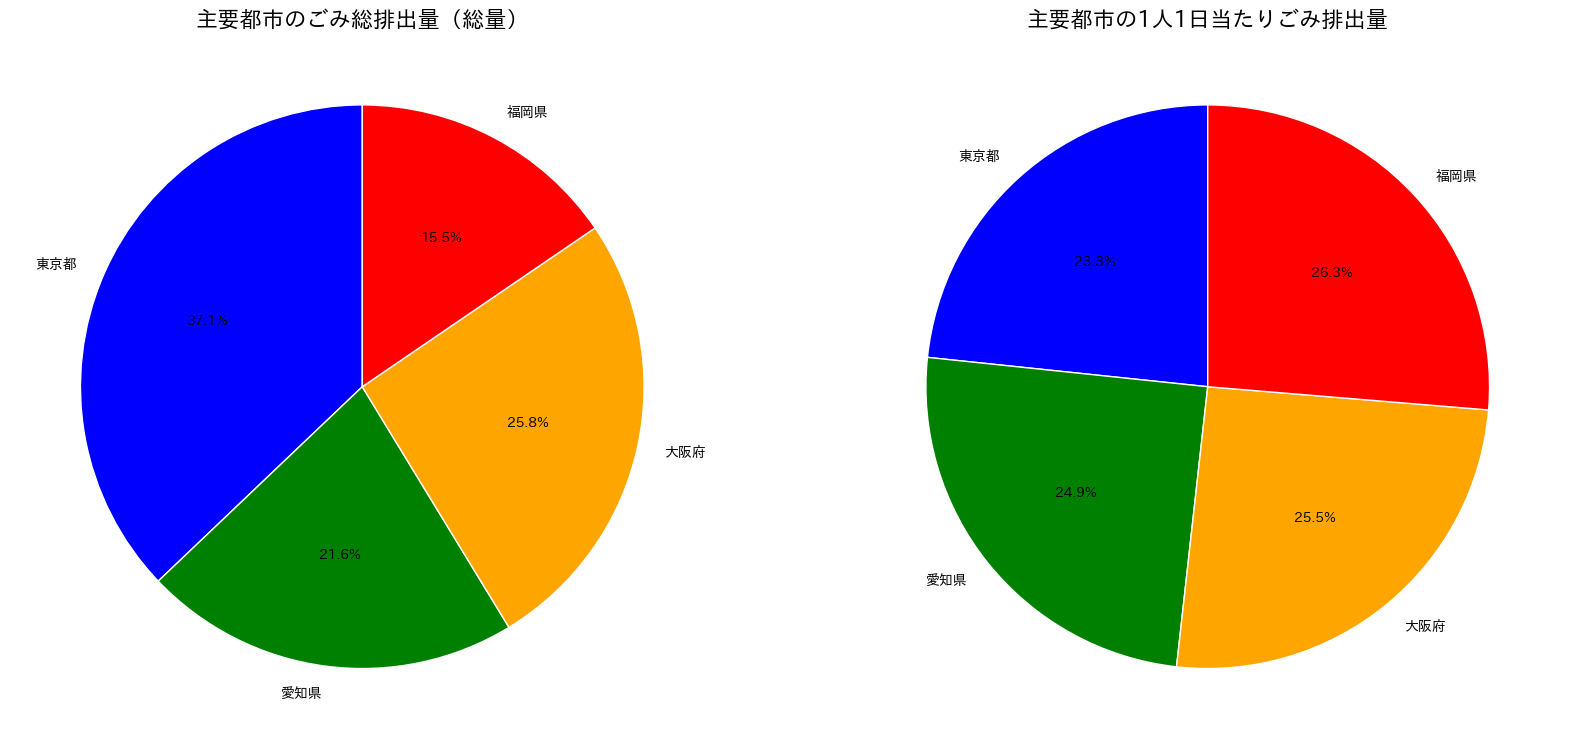

In [18]:
#7
df03 = df.loc[['東京都', '愛知県', '大阪府', '福岡県'], ['ごみ総排出量（総量）',
                                             '1人1日当たりの排出量', 'ごみのリサイクル率']]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.pie(x=df03['ごみ総排出量（総量）'],labels=df03.index, colors=['blue','green','orange','red'],
        autopct='%.1f%%' ,pctdistance=0.6, labeldistance=1.1, startangle=90, radius=1.0,
        counterclock=True, wedgeprops={'width':1, 'edgecolor':'white'}, normalize=True)
ax1.set_title('主要都市のごみ総排出量（総量）', fontsize=16)

ax2.pie(x=df03['1人1日当たりの排出量'],labels=df03.index, colors=['blue','green','orange','red'],
        autopct='%.1f%%' ,pctdistance=0.6, labeldistance=1.1, startangle=90, radius=1.0,
        counterclock=True, wedgeprops={'edgecolor':'white'}, normalize=True)
ax2.set_title('主要都市の1人1日当たりごみ排出量', fontsize=16)
plt.show()

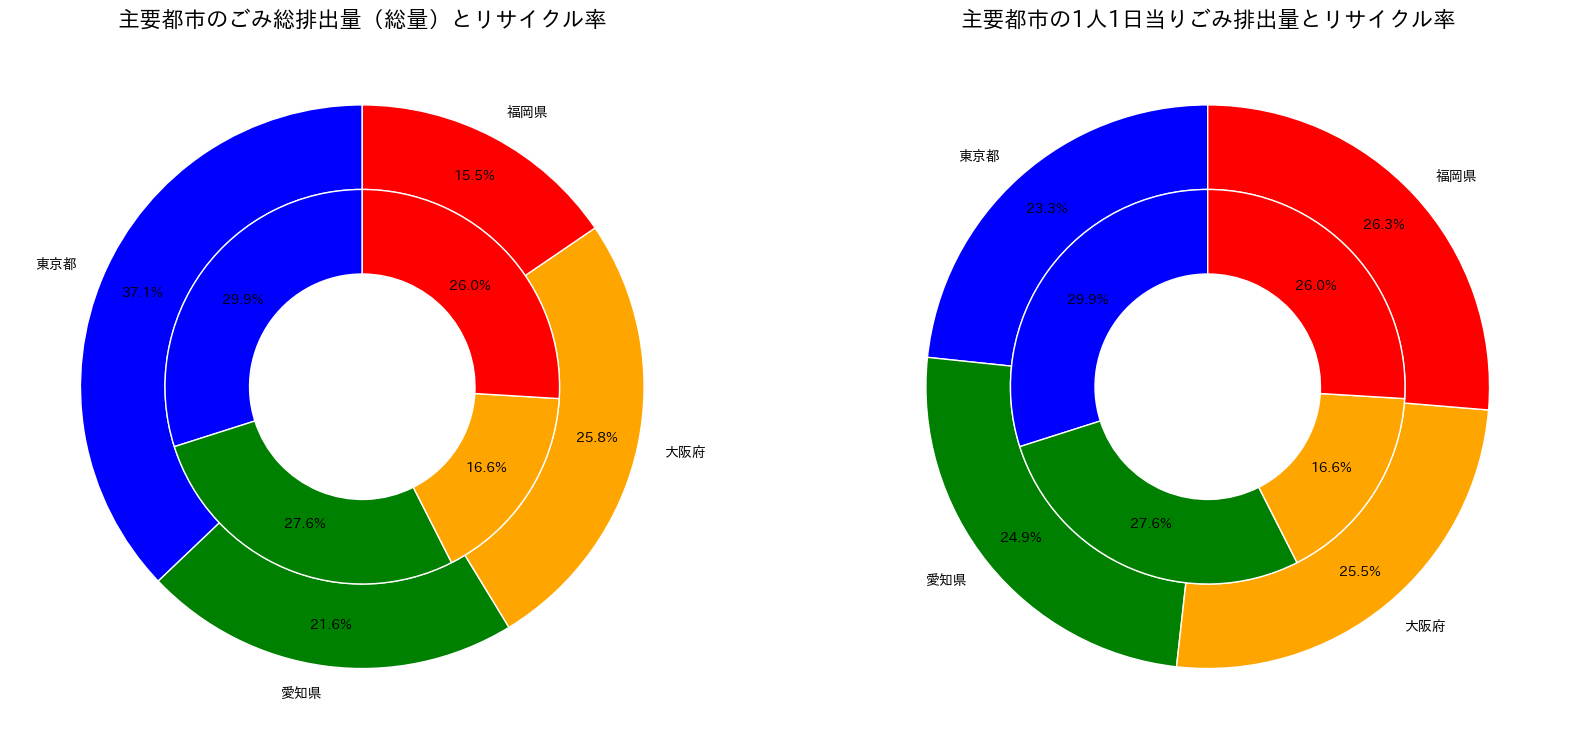

In [19]:
#8
df03 = df.loc[['東京都', '愛知県', '大阪府', '福岡県'], ['ごみ総排出量（総量）',
                                             '1人1日当たりの排出量', 'ごみのリサイクル率']]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.pie(x=df03['ごみ総排出量（総量）'],labels=df03.index, colors=['blue','green','orange','red'],
        autopct='%.1f%%' ,pctdistance=0.85, labeldistance=1.1, startangle=90, radius=1.0,
        counterclock=True, wedgeprops={'width':0.3, 'edgecolor':'white'}, normalize=True)
ax1.pie(df03['ごみのリサイクル率'] ,colors=['blue','green','orange','red'], autopct='%.1f%%' ,
        pctdistance=0.75, startangle=90, radius=0.7, counterclock=True,
        wedgeprops={'width':0.3, 'edgecolor':'white'}, normalize=True)
ax1.set_title('主要都市のごみ総排出量（総量）とリサイクル率', fontsize=16)

ax2.pie(x=df03['1人1日当たりの排出量'],labels=df03.index, colors=['blue','green','orange','red'],
        autopct='%.1f%%' ,pctdistance=0.85, labeldistance=1.1, startangle=90, radius=1.0,
        counterclock=True, wedgeprops={'width':0.3, 'edgecolor':'white'}, normalize=True)
ax2.pie(df03['ごみのリサイクル率'] ,colors=['blue','green','orange','red'], autopct='%.1f%%',
        pctdistance=0.75, startangle=90, radius=0.7, counterclock=True,
        wedgeprops={'width':0.3, 'edgecolor':'white'}, normalize=True)
ax2.set_title('主要都市の1人1日当りごみ排出量とリサイクル率', fontsize=16)
plt.show()

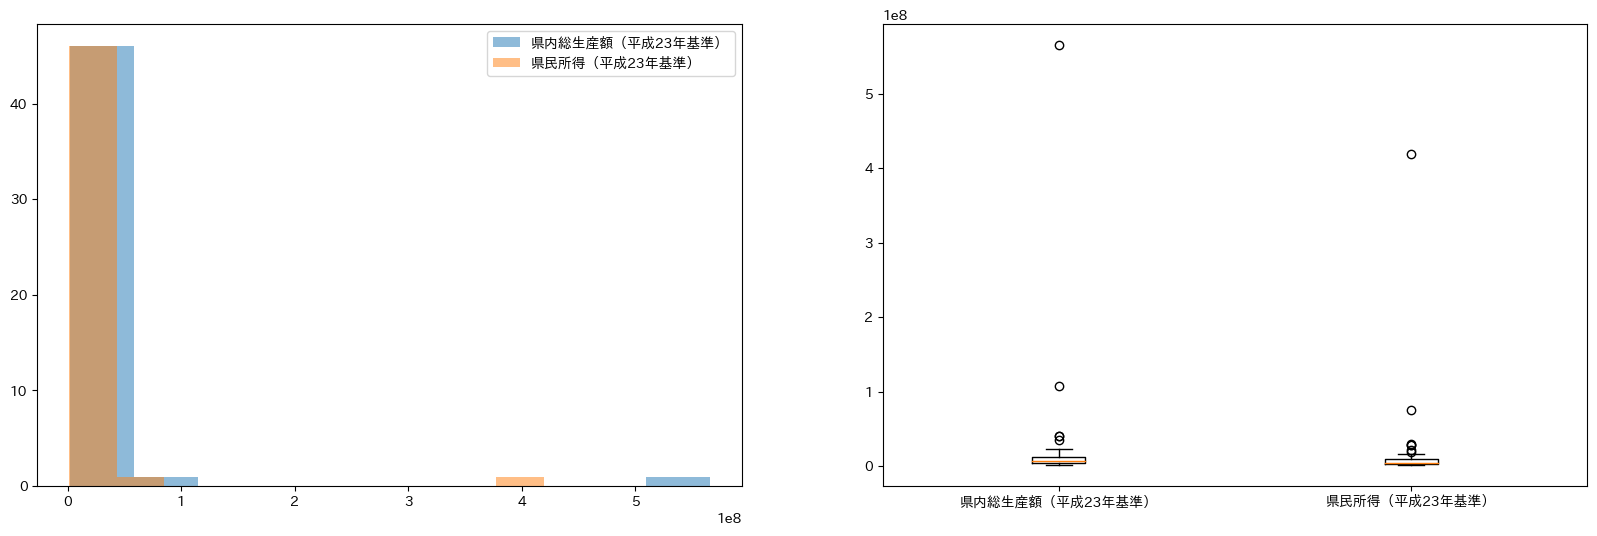

In [20]:
#9
df04 = df[['県内総生産額（平成23年基準）', '県民所得（平成23年基準）']]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
ax1.hist(df04['県内総生産額（平成23年基準）'], alpha=0.5)
ax1.hist(df04['県民所得（平成23年基準）'], alpha=0.5)
ax2.boxplot(df04[['県内総生産額（平成23年基準）','県民所得（平成23年基準）']],
            labels=df04.columns)
ax1.legend(labels=df04.columns)
plt.show()

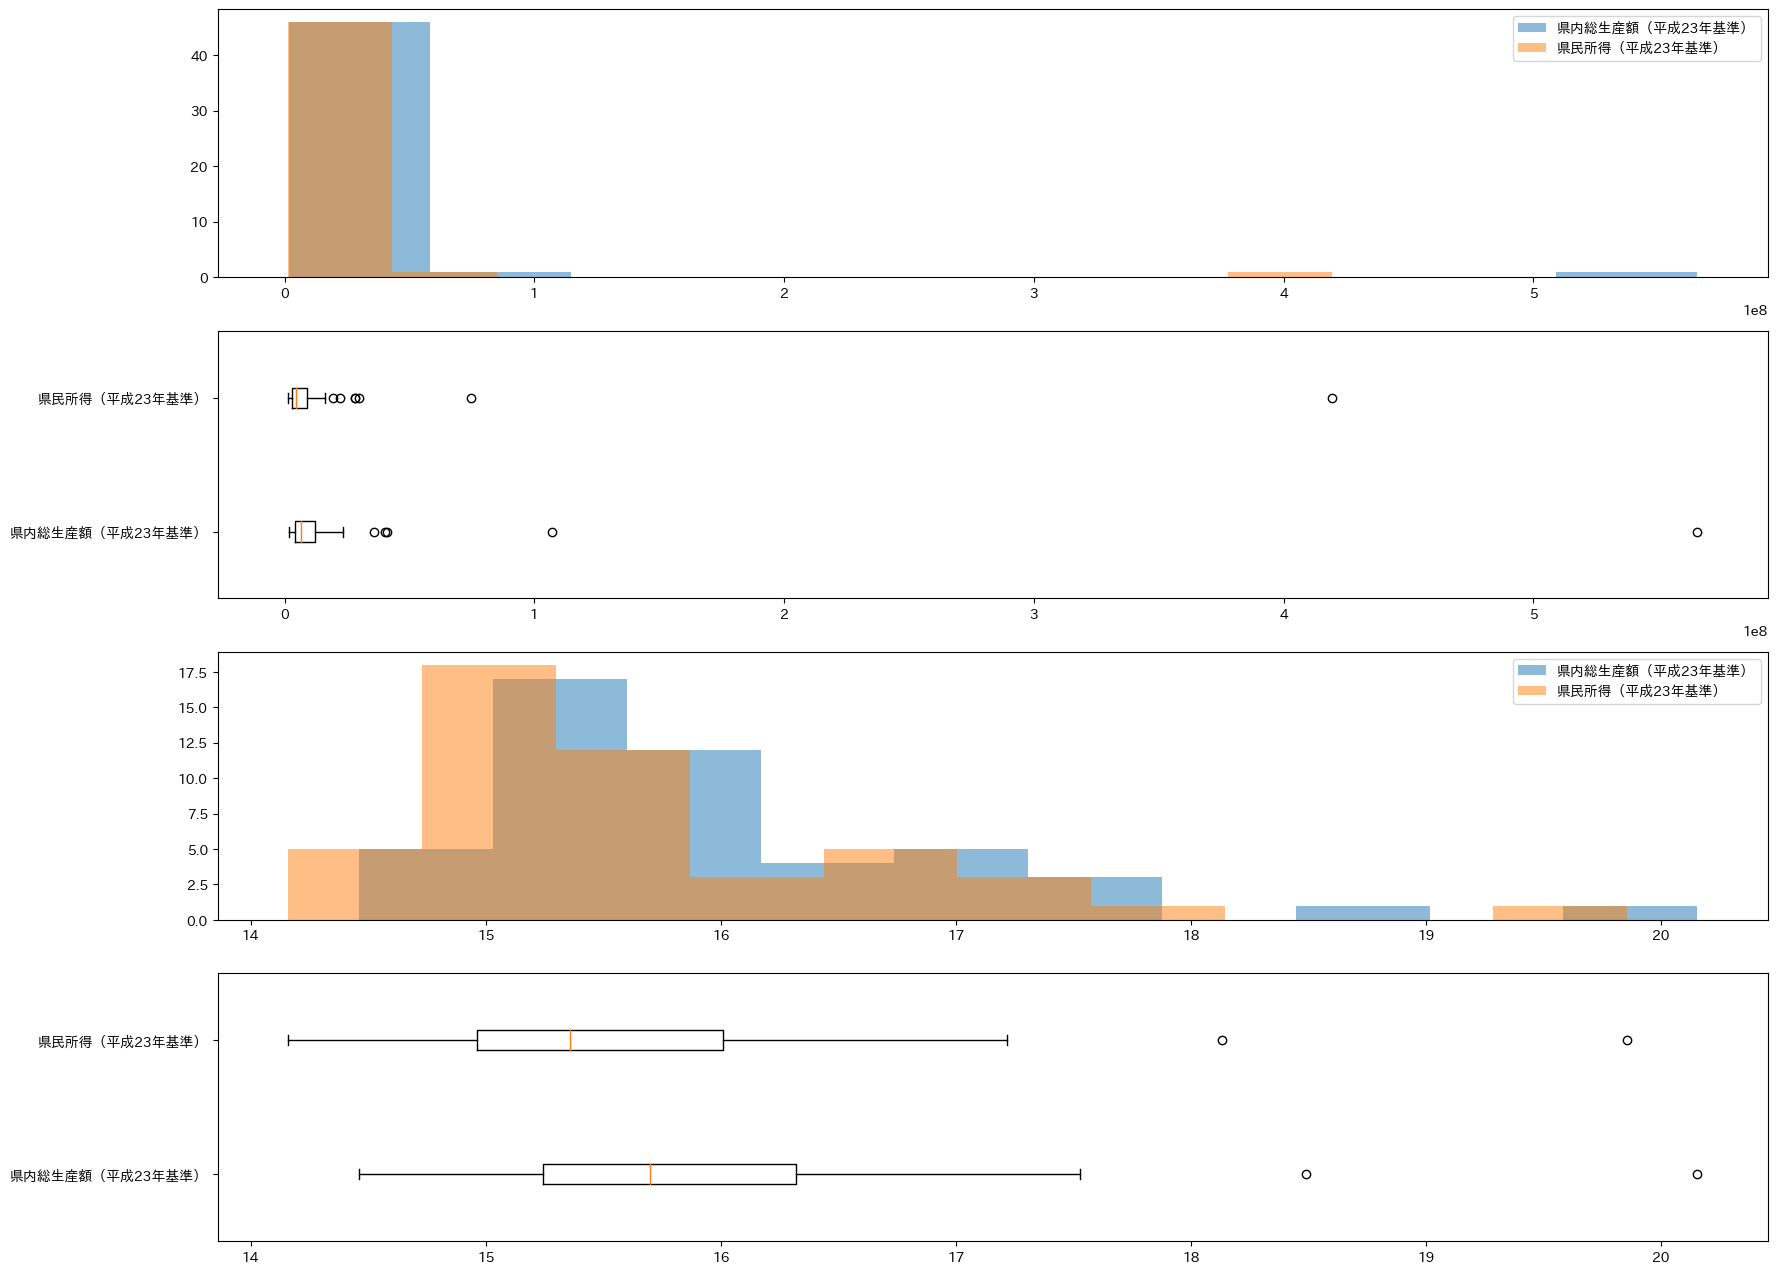

In [21]:
#10
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 16))
ax1.hist(df04['県内総生産額（平成23年基準）'], alpha=0.5)
ax1.hist(df04['県民所得（平成23年基準）'], alpha=0.5)
ax2.boxplot(df04[['県内総生産額（平成23年基準）','県民所得（平成23年基準）']], vert=False,
            labels=df04.columns)
ax1.legend(labels=df04.columns)

df04_log = np.log(df[['県内総生産額（平成23年基準）', '県民所得（平成23年基準）']])

ax3.hist(df04_log['県内総生産額（平成23年基準）'], alpha=0.5)
ax3.hist(df04_log['県民所得（平成23年基準）'], alpha=0.5)
ax4.boxplot(df04_log[['県内総生産額（平成23年基準）','県民所得（平成23年基準）']], vert=False,
            labels=df04_log.columns)
ax3.legend(labels=df04_log.columns)
plt.show()